In [32]:
from preprocess_email import ham_df,spam_df, combined_df
import nltk
import numpy as np
import seaborn as sns
import pandas as pd

In [33]:
values = combined_df['Label'].value_counts()
total = values.sum()

percentage_0 = (values[0] /total) * 100 #ham
percentage_1 = (values[1]/ total) *100 #spam

print('percentage of ham :' ,percentage_0)
print('percentage of spam :' ,percentage_1)

# print(combined_df.shape)
# print(combined_df['Label'].value_counts())

percentage of ham : 56.869918699187
percentage of spam : 43.130081300813


In [34]:
# first_row = combined_df.iloc[:5]
# test_df = pd.DataFrame(first_row)

In [35]:
nltk.download("stopwords")
nltk.download("punkt")
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words("english"))



nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

from nltk.stem import PorterStemmer
stemmer = PorterStemmer()



import string

def process_text(content):
    filtered_list = []
    remove_punc = []
    content = content.lower()
    content = word_tokenize(content)
    for word in content:
        remove_punc = [word for word in content if word not in string.punctuation] # remove punctuation
    
    content = remove_punc
    
    # remove_punc.clear()
    
    for word in content:
        if word.casefold() not in stop_words:
            filtered_list.append(word)

    
    lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_list]
    # stemmed_words = [stemmer.stem(word) for word in filtered_list]
    content.clear()
    remove_punc.clear()
    
    return ' '.join(lemmatized_words)
    # return ' '.join(stemmed_words)
    

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vishw\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vishw\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vishw\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\vishw\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [36]:
combined_df['processed_text'] = combined_df['Main_Content'].apply(process_text)
print(combined_df.shape)
combined_df.describe()

(2460, 3)


,Label
count,2460.000000
mean,0.431301
std,0.495359
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [37]:
# output_excel_path = r'c:\Users\vishw\OneDrive\Desktop\test2.csv'
# first_row.to_csv(output_excel_path, index=False)
combined_df.tail()

,Main_Content,Label,processed_text
2455,Long time no chatHow have you been If youve be...,1,long time chathow youve like youve tryingtryin...
2456,Below is the result of your feedback form It w...,1,result feedback form submitted thursday july 2...
2457,When Americas top companies compete for your b...,1,america top company compete business wintake m...
2458,Want to watch HARDCORE PORN MOVIES Our site is...,1,want watch hardcore porn movie site voted 1 br...
2459,Dear cypherpunks 7000EMAIL150 7000Email7000 BE...,1,dear cypherpunks 7000email150 7000email7000 em...


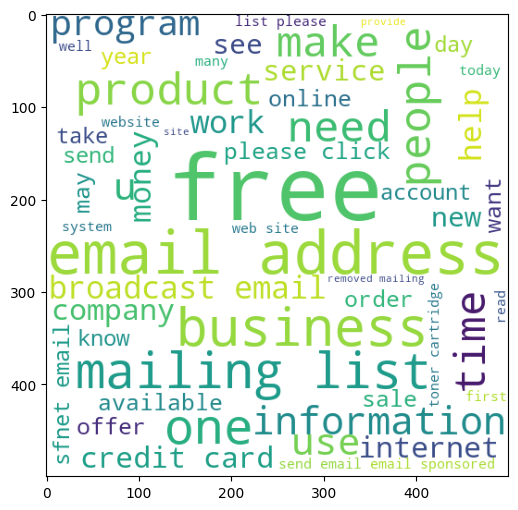

In [38]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'white')
spam_wc = wc.generate(combined_df[combined_df['Label'] == 1]['processed_text'].str.cat(sep = " "))
plt.figure(figsize = (15,6))
plt.imshow(spam_wc)
plt.show()

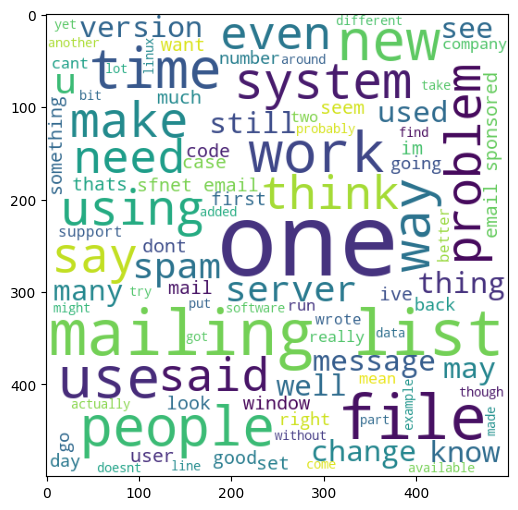

In [39]:
ham_wc = wc.generate(combined_df[combined_df['Label'] == 0]['processed_text'].str.cat(sep = " "))
plt.figure(figsize = (15,6))
plt.imshow(ham_wc)
plt.show()

In [40]:
spam_carpos = []
for sentence in combined_df[combined_df['Label'] == 1]['processed_text'].tolist():
    for word in sentence.split():
        spam_carpos.append(word)

In [41]:
from collections import Counter
filter_df = pd.DataFrame(Counter(spam_carpos).most_common(30))

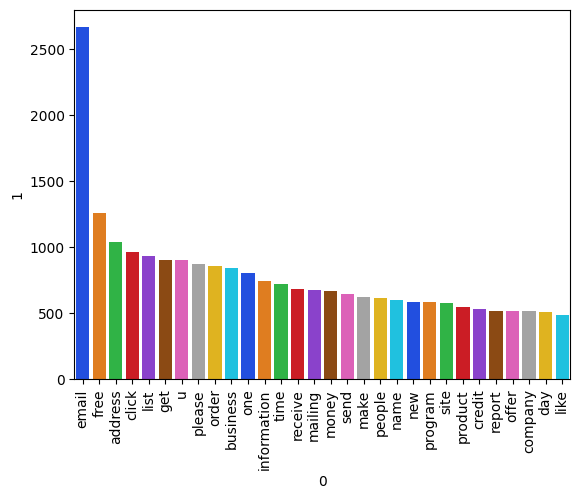

In [42]:
sns.barplot(data = filter_df, x = filter_df[0], y = filter_df[1], palette = 'bright')
plt.xticks(rotation = 90)
plt.show()

In [43]:
ham_carpos = []
for sentence in combined_df[combined_df['Label'] == 0]['processed_text'].tolist():
    for word in sentence.split():
        ham_carpos.append(word)

In [44]:
filter_ham_df = pd.DataFrame(Counter(ham_carpos).most_common(30))

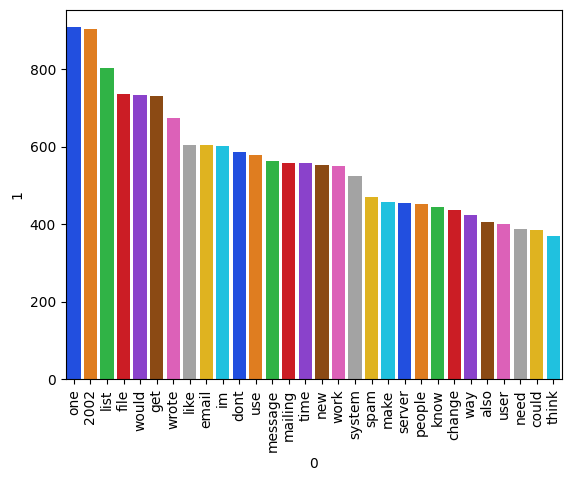

In [45]:
sns.barplot(data = filter_ham_df, x = filter_ham_df[0], y = filter_ham_df[1], palette = 'bright')
plt.xticks(rotation = 90)
plt.show()

In [46]:
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features = 3000)

In [47]:
from sklearn.model_selection import train_test_split

X = combined_df['processed_text'].astype(str)
X_tfidf = tfidf.fit_transform(X)
labels = combined_df['Label'].values

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, labels, test_size=0.2, random_state=50)

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score

# Assuming X_train, X_test, y_train, y_test are your training and testing data
# Create and fit logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Predict on test data
y_pred = logistic_model.predict(X_test)
# Evaluate model
LR_accuracy = accuracy_score(y_test, y_pred)
LR_precision = precision_score(y_test, y_pred)
print("Accuracy:", LR_accuracy)
print("Precision:", LR_precision)

Accuracy: 0.975609756097561
Precision: 0.9906976744186047


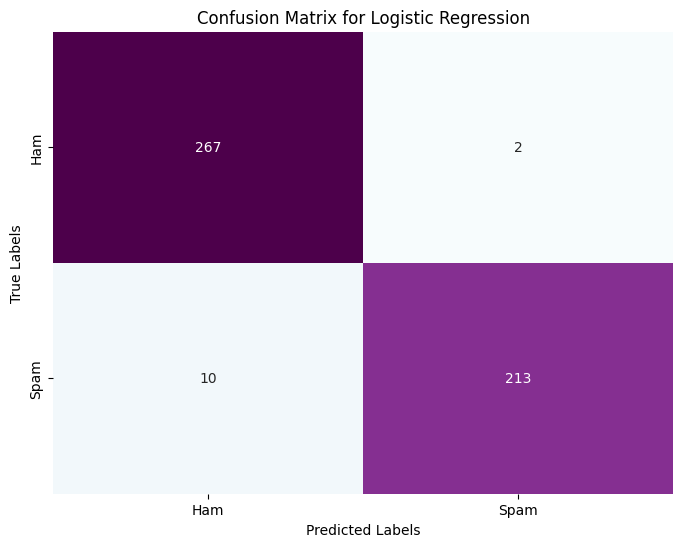

In [49]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)

import matplotlib.pyplot as plt
import seaborn as sns

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="BuPu", fmt="d", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Logistic Regression')

plt.xticks(ticks=[0.5, 1.5], labels=['Ham', 'Spam'])  
plt.yticks(ticks=[0.5, 1.5], labels=['Ham', 'Spam'])  


plt.show()


In [50]:
from sklearn.naive_bayes import MultinomialNB

NB_model = MultinomialNB()
NB_model.fit(X_train, y_train)

# Predict on test data
y_pred = NB_model.predict(X_test)
# Evaluate model
NB_accuracy = accuracy_score(y_test, y_pred)
NB_precision = precision_score(y_test, y_pred)
print("Accuracy:", NB_accuracy)
print("Precision:", NB_precision)

Accuracy: 0.9735772357723578
Precision: 0.9772727272727273


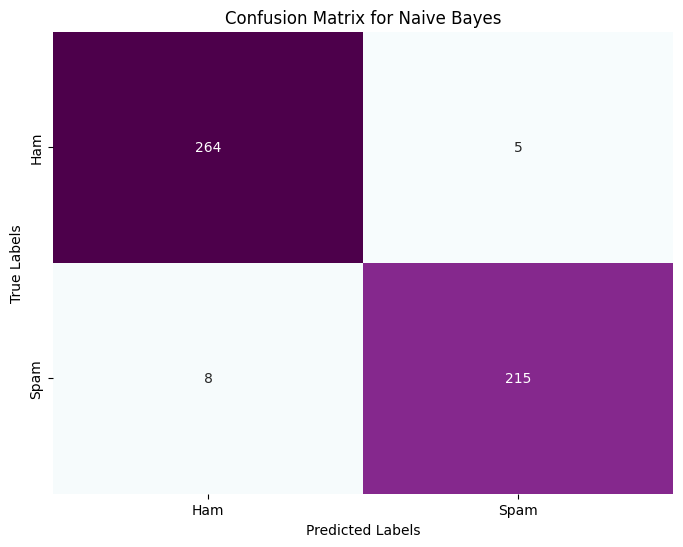

In [51]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="BuPu", fmt="d", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Naive Bayes')

plt.xticks(ticks=[0.5, 1.5], labels=['Ham', 'Spam'])  
plt.yticks(ticks=[0.5, 1.5], labels=['Ham', 'Spam'])  


plt.show()

In [52]:
from sklearn.svm import SVC

num_features = X_train.shape[1]
SVM = SVC()
SVM.fit(X_train, y_train)

y_pred = SVM.predict(X_test)

SVM_accuracy = accuracy_score(y_test, y_pred)
SVM_precision = precision_score(y_test, y_pred)
print("Accuracy:", SVM_accuracy)
print("Precision:", SVM_precision)

Accuracy: 0.9817073170731707
Precision: 0.9908256880733946


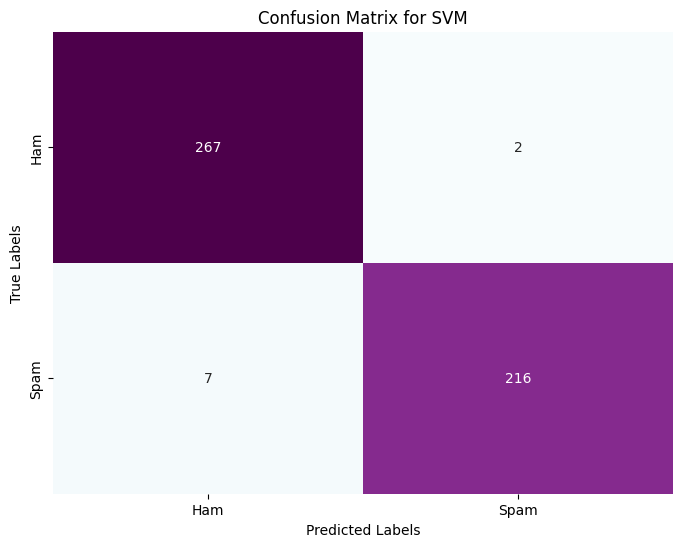

In [53]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="BuPu", fmt="d", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for SVM')

plt.xticks(ticks=[0.5, 1.5], labels=['Ham', 'Spam'])
plt.yticks(ticks=[0.5, 1.5], labels=['Ham', 'Spam'])


plt.show()

In [54]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier(max_depth =10)
DT.fit(X_train, y_train)

y_pred = DT.predict(X_test)

DT_accuracy = accuracy_score(y_test, y_pred)
DT_precision = precision_score(y_test, y_pred)
print("Accuracy:", DT_accuracy)
print("Precision:", DT_precision)

Accuracy: 0.9044715447154471
Precision: 0.9230769230769231


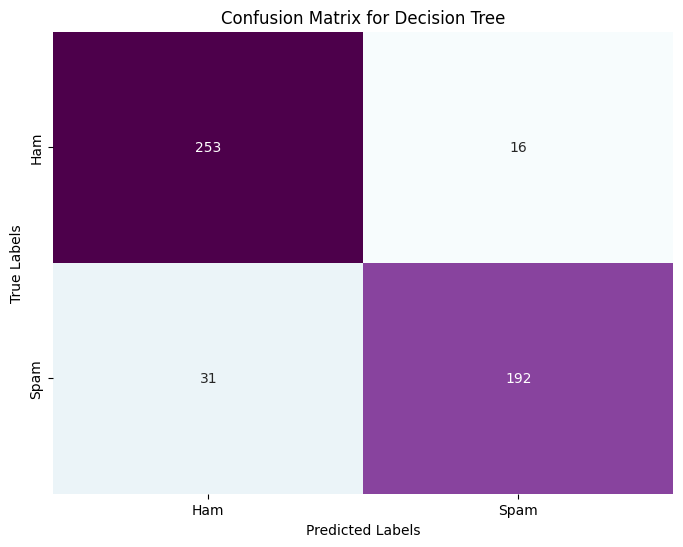

In [55]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="BuPu", fmt="d", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Decision Tree')

plt.xticks(ticks=[0.5, 1.5], labels=['Ham', 'Spam'])
plt.yticks(ticks=[0.5, 1.5], labels=['Ham', 'Spam'])


plt.show()

In [56]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors=1)
KNN.fit(X_train, y_train)

y_pred = KNN.predict(X_test)

KNN_accuracy = accuracy_score(y_test, y_pred)
KNN_precision = precision_score(y_test, y_pred)
print("Accuracy:", KNN_accuracy)
print("Precision:", KNN_precision)

Accuracy: 0.7865853658536586
Precision: 0.6798780487804879


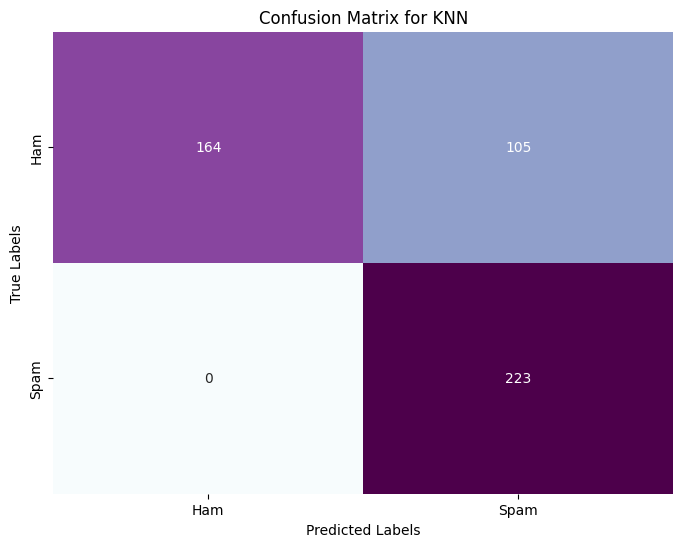

In [57]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="BuPu", fmt="d", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for KNN')

plt.xticks(ticks=[0.5, 1.5], labels=['Ham', 'Spam'])
plt.yticks(ticks=[0.5, 1.5], labels=['Ham', 'Spam'])


plt.show()

In [58]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators = 100, random_state = 2 )
RF.fit(X_train, y_train)

y_pred = RF.predict(X_test)

RF_accuracy = accuracy_score(y_test, y_pred)
RF_precision = precision_score(y_test, y_pred)
print("Accuracy:", RF_accuracy)
print("Precision:", RF_precision)

Accuracy: 0.9695121951219512
Precision: 0.9482758620689655


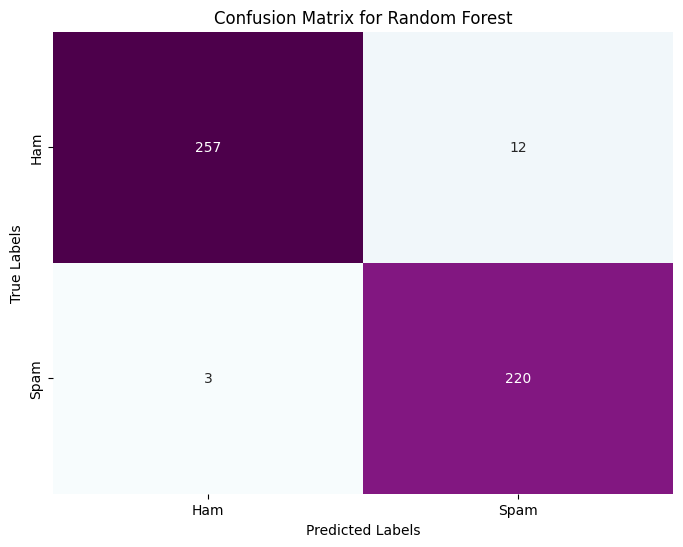

In [59]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="BuPu", fmt="d", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Random Forest')

plt.xticks(ticks=[0.5, 1.5], labels=['Ham', 'Spam'])
plt.yticks(ticks=[0.5, 1.5], labels=['Ham', 'Spam'])


plt.show()

## Comparison Between Models

In [60]:
model_table = [
    {'Model': 'Logistic Regression', 'Accuracy': LR_accuracy, 'Precision': LR_precision},
    {'Model': 'Naive Bayes', 'Accuracy': NB_accuracy, 'Precision': NB_precision},
    {'Model': 'SVM', 'Accuracy': SVM_accuracy, 'Precision': SVM_precision},
    {'Model': 'Decision Tree', 'Accuracy': DT_accuracy, 'Precision': DT_precision},
    {'Model': 'KNN', 'Accuracy': KNN_accuracy, 'Precision': KNN_precision},
    {'Model': 'Random Forest', 'Accuracy': RF_accuracy, 'Precision': RF_precision},
]

# Convert the data to a DataFrame
df = pd.DataFrame(model_table)


# Sort the DataFrame by both Accuracy and Precision scores
sorted_df = df.sort_values(by=['Accuracy', 'Precision'], ascending=[False, False])
sorted_df.reset_index(drop=True, inplace=True)

sorted_df.index = range(1, len(df) + 1)
sorted_df


,Model,Accuracy,Precision
1,SVM,0.981707,0.990826
2,Logistic Regression,0.975610,0.990698
3,Naive Bayes,0.973577,0.977273
4,Random Forest,0.969512,0.948276
5,Decision Tree,0.904472,0.923077
6,KNN,0.786585,0.679878


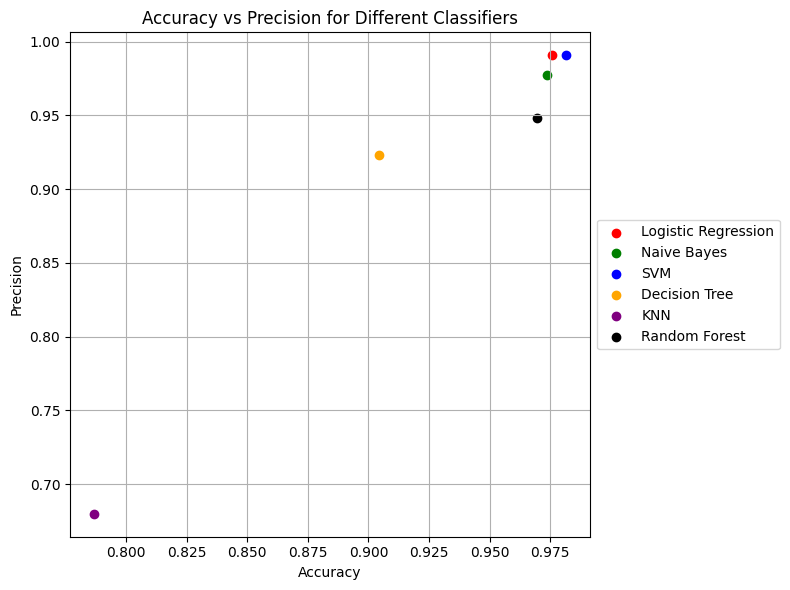

In [61]:
import matplotlib.pyplot as plt

# Extract accuracy and precision values
accuracy_values = df['Accuracy']
precision_values = df['Precision']
model_names = df['Model']


model_colors = {
    'Logistic Regression': 'red',
    'SVM': 'blue',
    'Naive Bayes': 'green',
    'Decision Tree': 'orange',
    'KNN': 'purple',
    'Random Forest': 'black'
}

# Create scatter plot with color coding based on model names
plt.figure(figsize=(8, 6))
for idx, model in enumerate(model_names):
    acc = accuracy_values[idx]
    prec = precision_values[idx]
    color = model_colors.get(model)
    plt.scatter(acc, prec, color=color, label=model)

# Add labels and title
plt.xlabel('Accuracy')
plt.ylabel('Precision')
plt.title('Accuracy vs Precision for Different Classifiers')

# Create legend on the side
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()


In [63]:
#save model using joblib
import joblib

joblib.dump(SVM, 'HOS_SVM.pkl')
joblib.dump(logistic_model, 'HOS_LR.pk1')
joblib.dump(NB_model, 'HOS_NB.pk1')
joblib.dump(tfidf, 'vectorizer1.pkl')

['vectorizer1.pkl']